# Tutorial 4: Visualisation

---

### Introduction

When dealing with classification data, visualisation is always useful because it can give us an idea of the distribution between the different classes. However, visualization is difficult if the data has many dimensions. To represent the data visually, it is necessary to reduce the dimensionality by identifying the most important features for characterizing the data--this is called _feature reduction_.  There are several methods for doing this. n this tutorial we will show how to use the following methods (for more information about each method, see links):
- [Principal component analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): this is the most widely used method for feature reduction.
- [T-distributed Stochastic Neighbor Embedding (tSNE)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)

Additional methods can be found [here](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)

---

First let's import some packages

In [22]:
import matplotlib.pyplot as plt # for plotting data/graphs
import numpy as np # For handling N-DIMENSIONAL ARRAYS

import tensorflow as tf #An end-to-end machine learning platform, focusing on training deep learning models
from tensorflow.keras import layers, losses # Implementation of the Keras API, the high-level API of TensorFlow.
from tensorflow.keras.models import Model #This displays graphs
import torchvision.transforms as transforms #Transforms are for common image transformations
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import scipy.stats as st

---

### Reading in data
The following code is the same as in Tutorial 1.

In [23]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Downloading data

First, let us call the python script that will let us download the data.

In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()




Next let's recall the data. This tutorial will use the extracted features from the shallow autoencoder model (2nd notebook).

In [25]:
import pickle
with open('./auto_df_train.pkl','rb') as file:
  auto_df_train = pickle.load(file)
with open('./auto_df_test.pkl','rb') as file1:
  auto_df_test = pickle.load(file1)
with open('./labels_train.pkl','rb') as file2:
  labels_train = pickle.load(file2)
with open('./labels_test.pkl','rb') as file3:
  labels_test = pickle.load(file3)
with open('./classes.pkl','rb') as file4:
  classes = pickle.load(file4)

In [26]:
print(auto_df_train.shape)
print(auto_df_test.shape)
print(labels_train.shape)
print(labels_test.shape)


(18000, 64)
(3000, 64)
(18000,)
(3000,)


In the graphs, we will show two classes at a time to bring out the differences between classes. So we create a list of pairs of classes.

In [27]:
print(classes)

['T-shirt/top', 'Trouser', 'Pullover']


In [28]:
from itertools import combinations
comb_class = list(combinations(classes, 2))
print(comb_class)

[('T-shirt/top', 'Trouser'), ('T-shirt/top', 'Pullover'), ('Trouser', 'Pullover')]


---

### Reduce dimensionality with PCA
PCA will take the original data with 64 features and identify two combined features which most effectively characterize the data variation. Each combined feature is a linear combination of the original 64 features (note that combined features may not have a direct practical interpretation--there only use is to characterize the data variation as much as possible).

Using `sklearn` it is easy to apply PCA to the dataset

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca_sample = PCA(n_components=2).fit_transform(np.array(auto_df_train))
print(pca_sample.shape)

(18000, 2)


The shape of the reduced PCA sample is now 8000 x 2 from 8000 x 64, so we can plot these samples in a 2D graph

We will represent the data using a scatterplot, and will superimpose confidence ellipses to bring out the general orientation and extent of the data. A confidence ellipse shows where the data is most heavily concentrated (i.e. where the probability density is highest). Confidence regions are used for predicting new observations with a certain degree of confidence, which depends on the confidence parameter (measured in standard deviations) used to generate the ellipse.

The function `draw_Confidence_ellipse` is in the file `ellipse.py` in the `source` subdirectory. The  syntax for the `draw_Confidence_ellipse` command is as follows:

 `draw_Confidence_ellipse (data1_x, data1_y, data2_x, data2_y, "y-axis label", "x-axis label", "title", x-scale, y-scale)"`


In [33]:
from ellipse import draw_confidence_ellipse
import pandas as pd # import panda package, and we call it pd. (saves the data as a data frame fromat)
import matplotlib.pyplot as plt # this package will be use to draw some usful graphs (like bar graphs)
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import scipy
from sklearn.metrics import mean_squared_error, r2_score

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs): # https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`
    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
def get_coorelationCoffe (x, y):
     return (np.corrcoef( [np.array(x).flatten(), np.array(y).flatten()] )[0][1] )

def error (coeff, x): # I need some explnation here, is this the SDevation error
    sd = np.sqrt( (1-(coeff**2))/(len(x)) )
    return sd
def p_value (coeff, sd): # I need some explnation here, is this name "p_value" correct ?
    z_score = coeff/sd
    p = scipy.stats.norm.sf(abs(z_score))*2
    return p



def draw_confidence_ellipse (x_c1, y_c1, x_c2, y_c2, xaxis, yaxis, sol, xl, yl):
    fig, ax_nstd = plt.subplots(figsize=(6, 6))


    arr_class = sol.split("vs")
    ax_nstd.scatter(np.array(x_c1).flatten(), np.array(y_c1).flatten(), s=6, color = 'blue')
    confidence_ellipse(np.array(x_c1).flatten(), np.array(y_c1).flatten(), ax_nstd, n_std=2,label=arr_class[0], edgecolor='blue', linestyle='--')


    ax_nstd.scatter(np.array(x_c2).flatten(),np.array(y_c2).flatten(), s=6, color = 'orange')

    confidence_ellipse(np.array(x_c2).flatten(), np.array(y_c2).flatten(), ax_nstd, n_std=2,label=arr_class[1], edgecolor='orange', linestyle='--')


    ax_nstd.set_title(sol,fontsize =16, fontweight ='bold')
    plt.xlabel(xaxis, fontweight ='bold', fontsize =16)
    plt.ylabel(yaxis, fontweight ='bold', fontsize =16)
    plt.ylim(yl)
    plt.xlim(xl)

    ax_nstd.legend(prop={"size":14})
    plt.show()




Now we're ready to create scatterplots for each pair of classes, using the combined features identified by PCA. It's better to plot only a subset of the data--otherwise the scatterplots are too crowded.  So we first define an index variable to select a sample.

In [34]:
np.random.seed(0)
idx = np.random.choice(1992, 1000)

Now for the plots!

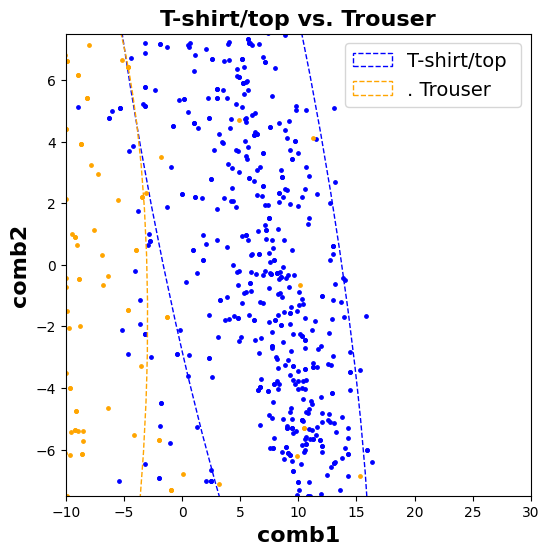

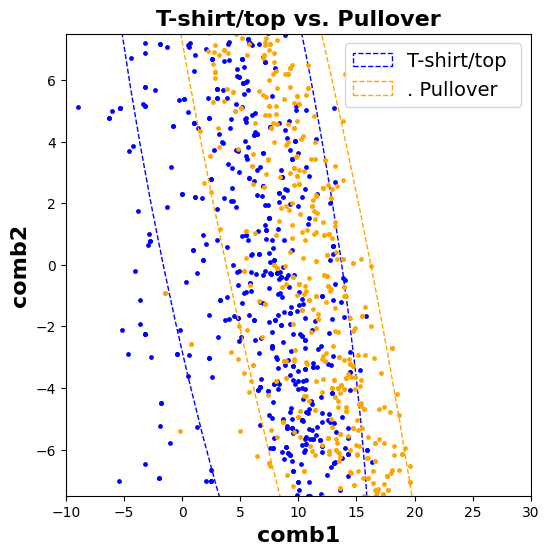

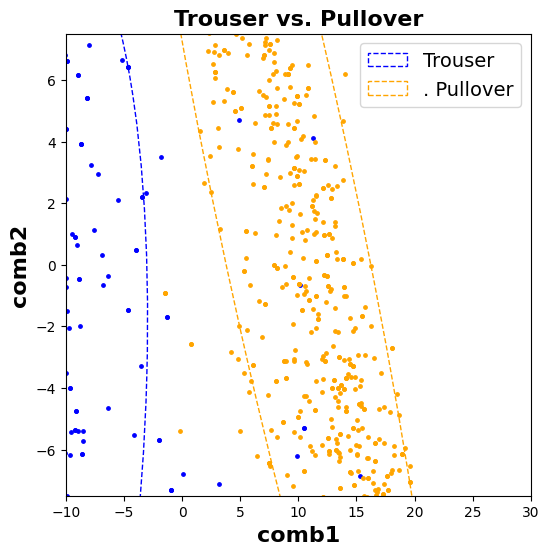

In [35]:
for cc in comb_class:
    class_i = (np.array(labels_train) == classes.index(cc[0]) ) # getting 1000 random samples from the 1st class
    class_j = (np.array(labels_train) == classes.index(cc[1]) ) # getting 1000 random samples from the 2nd class

    draw_confidence_ellipse (pca_sample[:, 0][class_i][idx], pca_sample[:, 1][class_i][idx],
                             pca_sample[:, 0][class_j][idx], pca_sample[:, 1][class_j][idx],
                             "comb1", "comb2", cc[0]+" vs. "+cc[1], (-10,30), (-7.5,7.5))


Any data samples that fall within both ellipses are likely to be confused between the two classes. Of the above graphs, smooth_round versus smooth_cigar shows the best separation, because many of smooth_cigar points are not in the smooth_round ellipse.

### Reduce dimensionality with TSNE
TSNE is an alternative dimension reduction method developed by Sam Roweis and Geoffrey Hinton. It is nonlinear, while PCA is linear.

In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne_sample = TSNE(n_components=2, init='pca', perplexity=10, learning_rate = 10).fit_transform(np.array(auto_df_train)[idx])

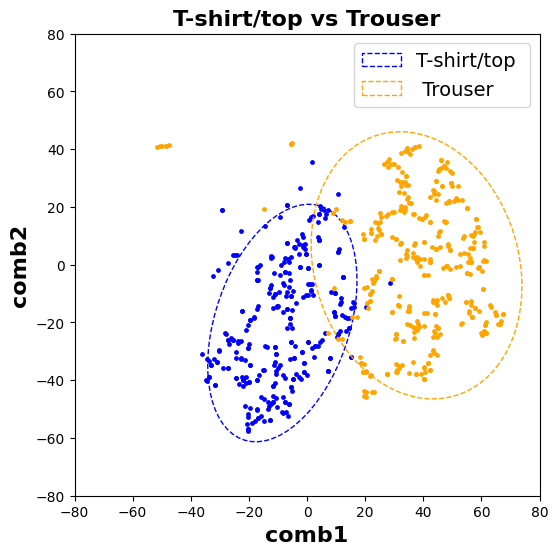

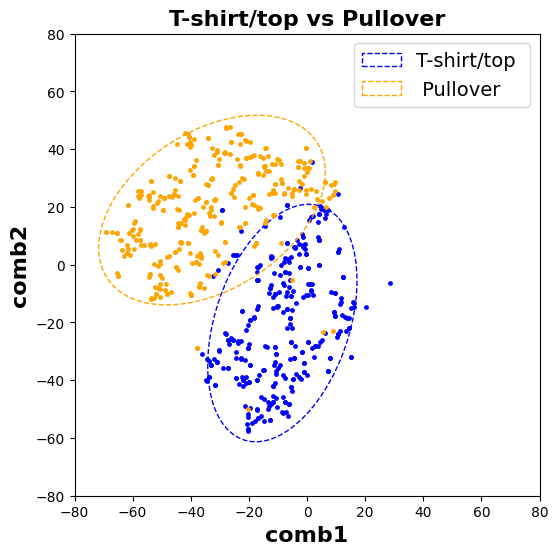

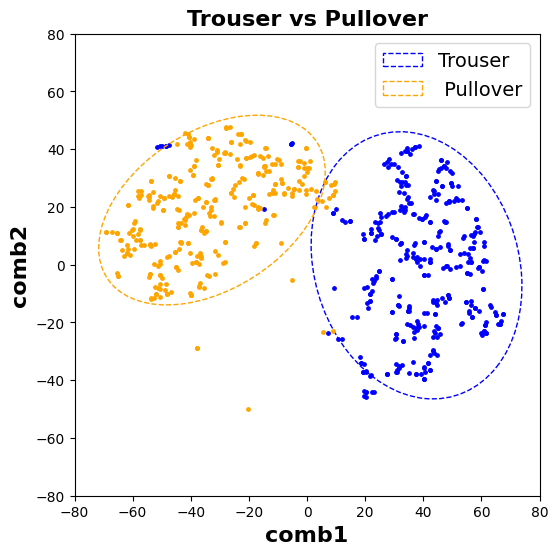

In [38]:
for cc in comb_class:
    class_i = (np.array(labels_train) == classes.index(cc[0]) )[idx] # we can restrict the number of samples from here
    class_j = (np.array(labels_train) == classes.index(cc[1]) )[idx]
    draw_confidence_ellipse (tsne_sample[:, 0][class_i], tsne_sample[:, 1][class_i], tsne_sample[:, 0][class_j], tsne_sample[:, 1][class_j], "comb1", "comb2", cc[0]+" vs "+cc[1], (-80,80), (-80,80))

The graph from both tools shows that it will be tough to distinguish between the `smooth round` and `unbarred_spiral`, because many of the points coincide. Also, the TSNE method does much better in determining the two classes than the PCA.

---

**Exercise :** from the List we showed [here](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)
choose another dimension reduction method and show the distibution between pairs of classes.

###**Reduce dimensionality with LocallyLinearEmbedding(LLE)**
LLE is a non-linear dimensionality reduction algorithm. It is used to transform high-dimensional data into a lower-dimensional representation while preserving the local structure of the data. LLE is based on the assumption that neighboring data in the original space should also be neighboring in the reduced space.

In [43]:
from sklearn.manifold import LocallyLinearEmbedding

In [44]:
#LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=2,eigen_solver='dense',method="standard")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA for dimension reduction
lda = LinearDiscriminantAnalysis(solver='eigen',n_components=2,shrinkage=0.9)


In [45]:
tsne_sample = lda.fit_transform(auto_df_train,labels_train)[idx]

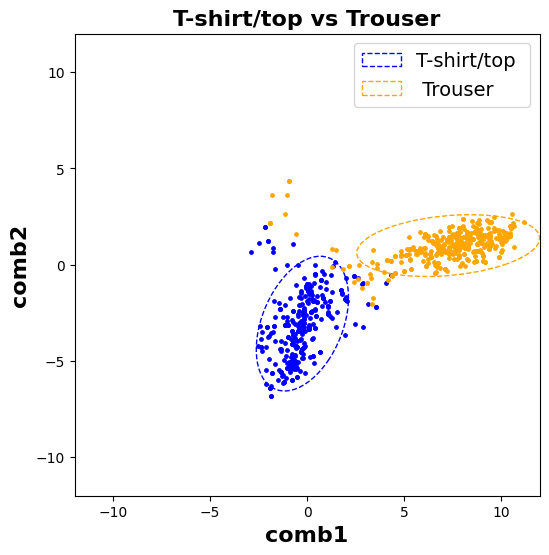

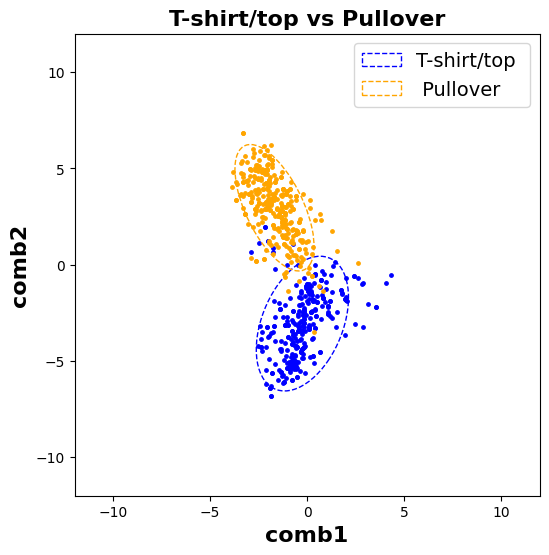

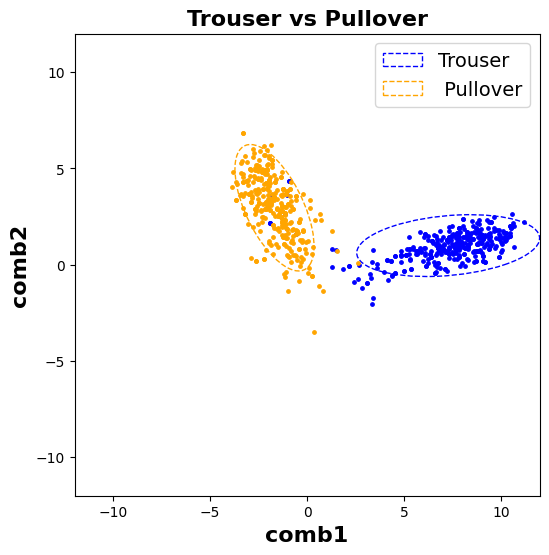

In [47]:
for cc in comb_class:
    class_i = (np.array(labels_train) == classes.index(cc[0]) )[idx] # we can restrict the number of samples from here
    class_j = (np.array(labels_train) == classes.index(cc[1]) )[idx]
    draw_confidence_ellipse (tsne_sample[:, 0][class_i], tsne_sample[:, 1][class_i], tsne_sample[:, 0][class_j], tsne_sample[:, 1][class_j], "comb1", "comb2", cc[0]+" vs "+cc[1], (-12,12), (-12,12))

---

### Save the data

---

Note, this tutorial is inspired by this work [here](https://spacetelescope.github.io/hellouniverse/notebooks/hello-universe/Classifying_PanSTARRS_sources_with_unsupervised_learning/Classifying_PanSTARRS_sources_with_unsupervised_learning.html)